In [37]:
import numpy as np
import pandas as pd

import pymysql
import dotenv
import os
import pickle
import seaborn as sns
import matplotlib

from datetime import timedelta

import matplotlib.pyplot as plt

# Normalization/Standardization
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder


# 경고 무시 코드 추가
import warnings
warnings.filterwarnings('ignore')

def pltconfig_default() :
  sns.reset_defaults()
  %matplotlib inline

pltconfig_default()

matplotlib.rcParams

matplotlib.rcParams['font.family']

current_font_list = matplotlib.rcParams['font.family']

font_path = 'C:\\Windows\\Fonts\\batang.ttc'

kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()

matplotlib.rcParams['font.family'] = [kfont] + current_font_list


In [38]:
with open('final_data', 'rb') as file :
  data = pickle.load(file)
    
# filter_test = (data['년'] == 2022) & (data['월'] == 5) & (data['일'] == 3)
# data[filter_test]['금일발전량']


# 일사량, 적설량 데이터 누락에 따른 제외
data = data.drop(['일사량', '적설량'], axis=1)
# data = data.fillna(0.0)

data.iloc[:, 4:].describe()

# data.head()

,강수량,풍속,풍향,습도,일조시간,전운량,시정,지면온도,금일발전량
count,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000,17518.000000
mean,0.116777,1.089828,140.401302,61.817274,0.274124,4.928645,2336.877269,16.408785,7522.534993
std,1.031508,0.964430,132.421098,22.557304,0.411494,3.991391,1530.613062,13.342216,11300.716530
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.500000,0.000000
25%,0.000000,0.400000,0.000000,45.000000,0.000000,0.000000,1300.000000,5.725000,0.000000
50%,0.000000,0.800000,140.000000,65.000000,0.000000,6.000000,2000.000000,17.000000,0.000000
75%,0.000000,1.600000,270.000000,82.000000,0.600000,9.000000,3399.000000,25.500000,13000.000000
max,37.900000,7.600000,360.000000,99.000000,1.000000,10.000000,44350.000000,58.900000,178000.000000


In [39]:
# sns.pairplot(data.iloc[:,4:])

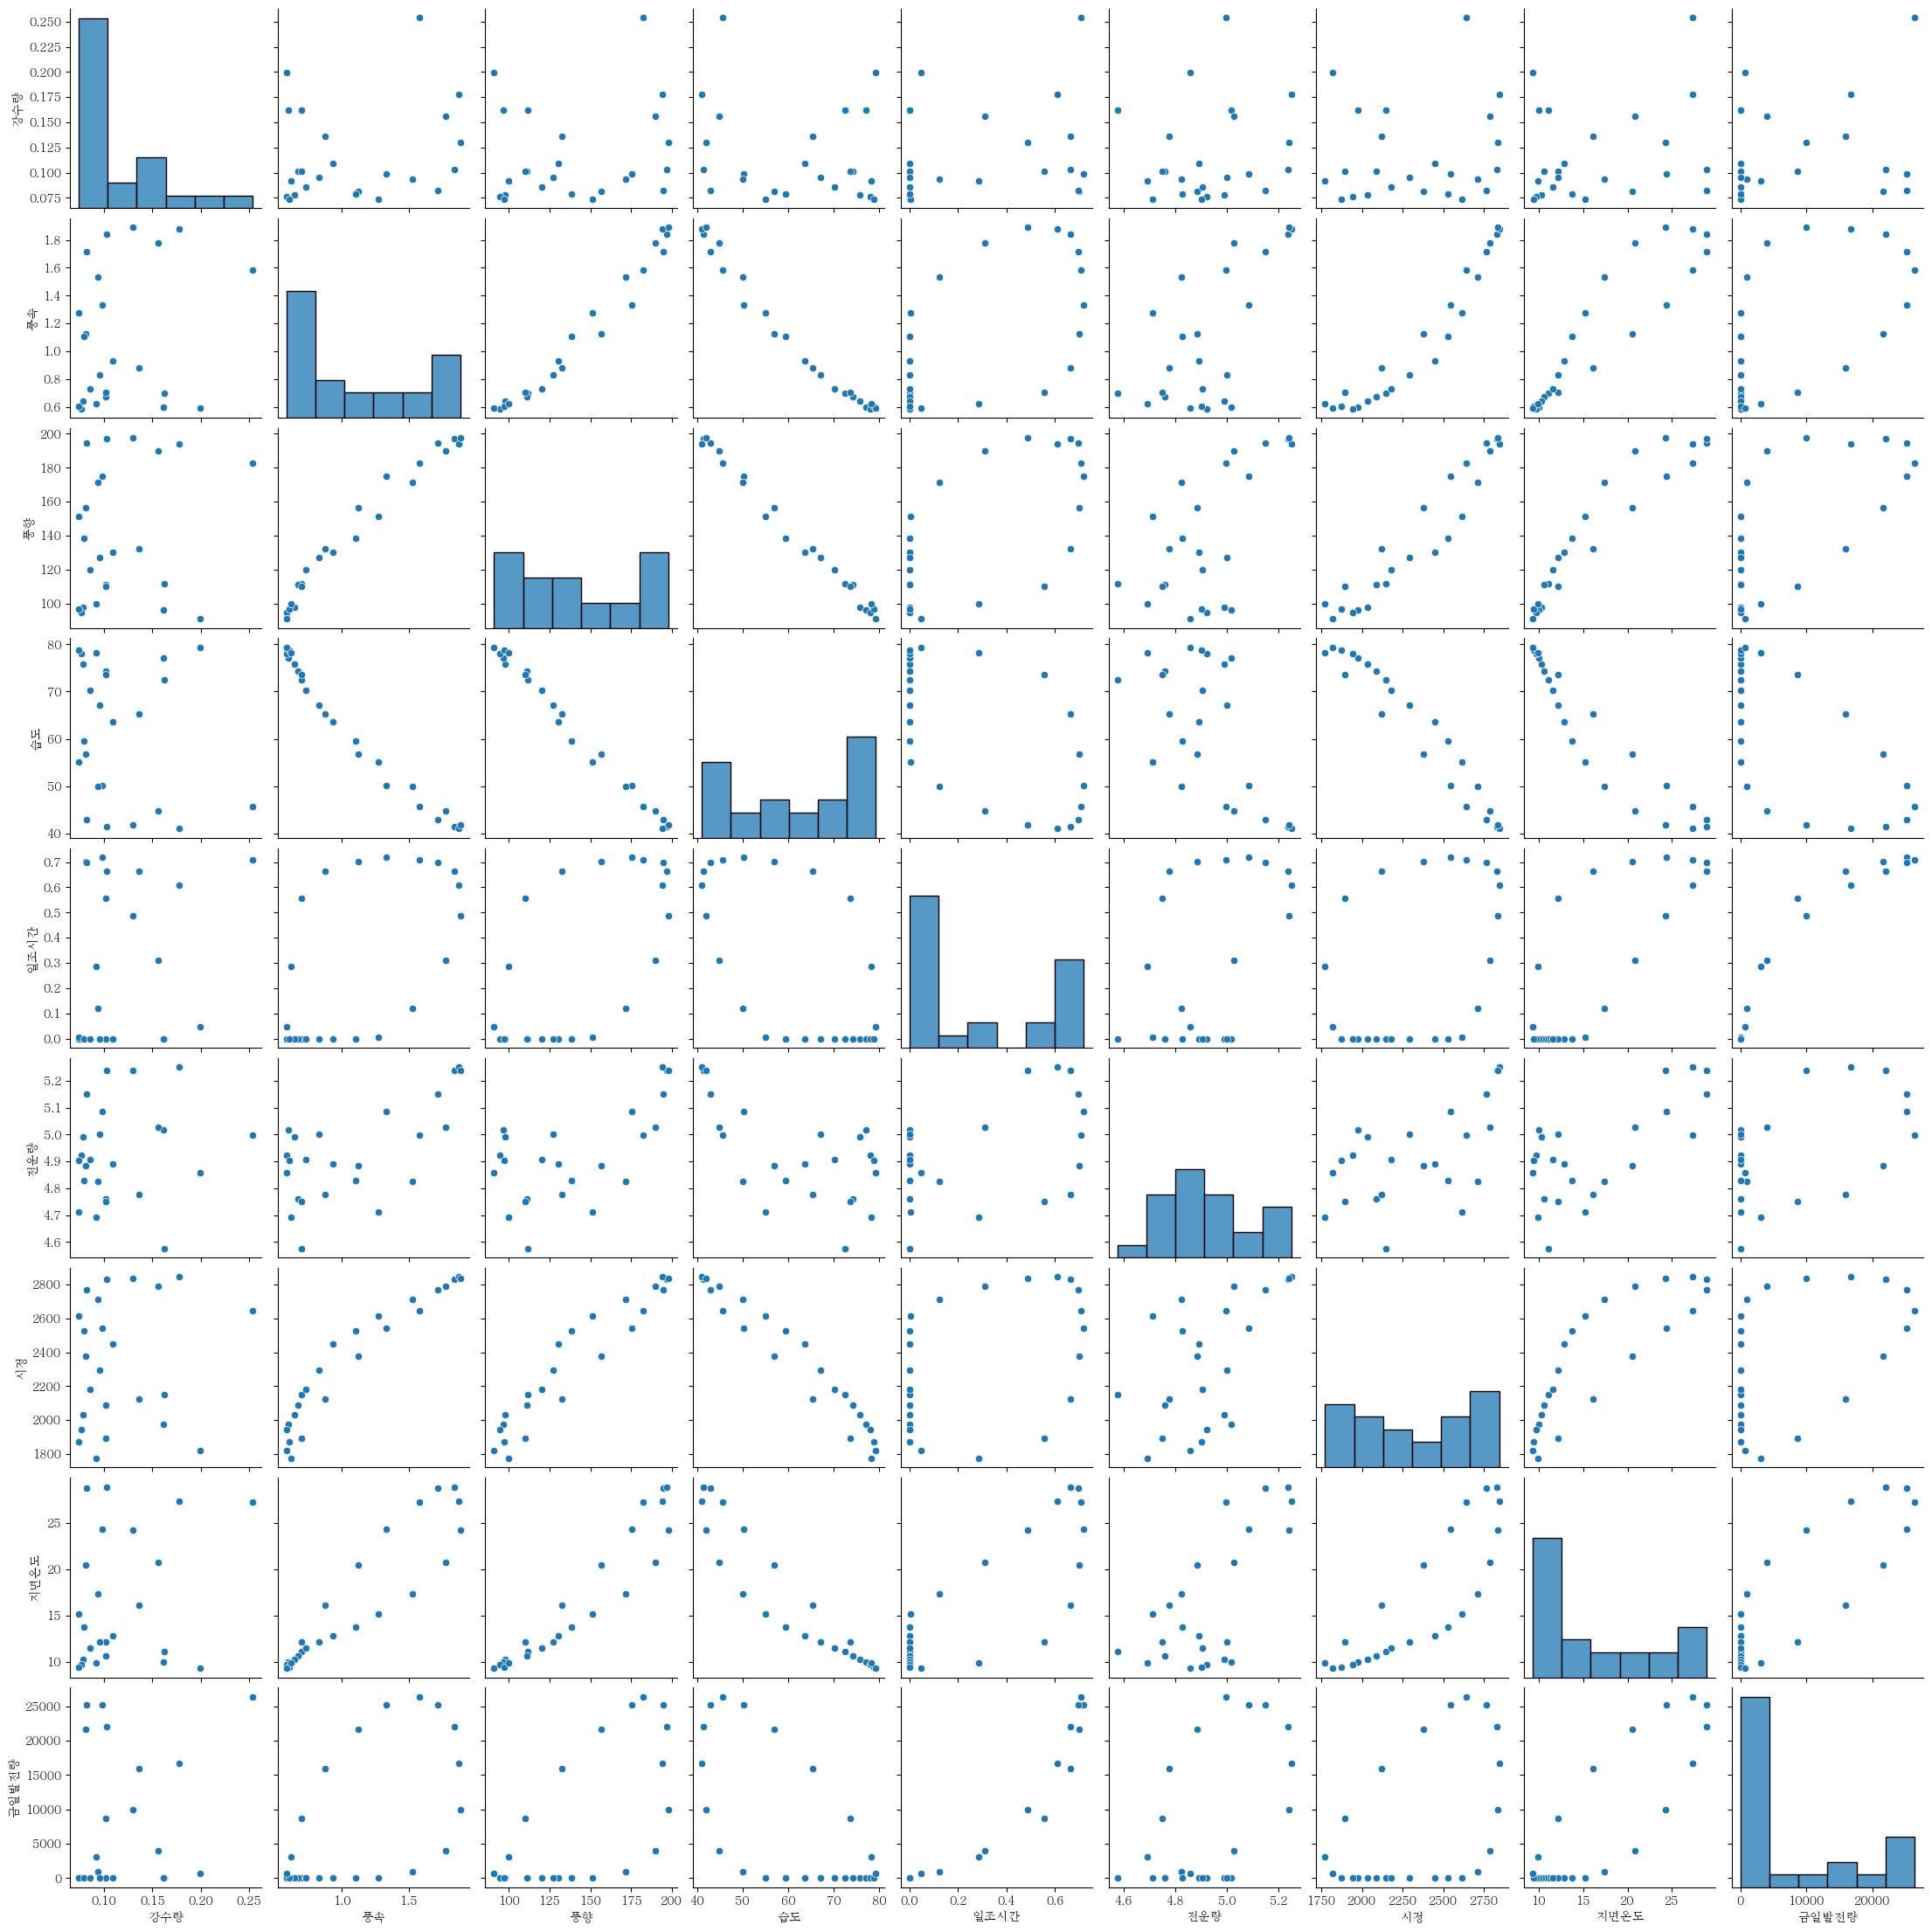

In [40]:
# 데이터 속성값 추가 관찰
df0 = data

g0 = df0.groupby('시간')
gr0 = g0.mean()

gr0 = gr0.iloc[:,3:]

sns.pairplot(gr0)
# plt.title('fairplot')

# gr0

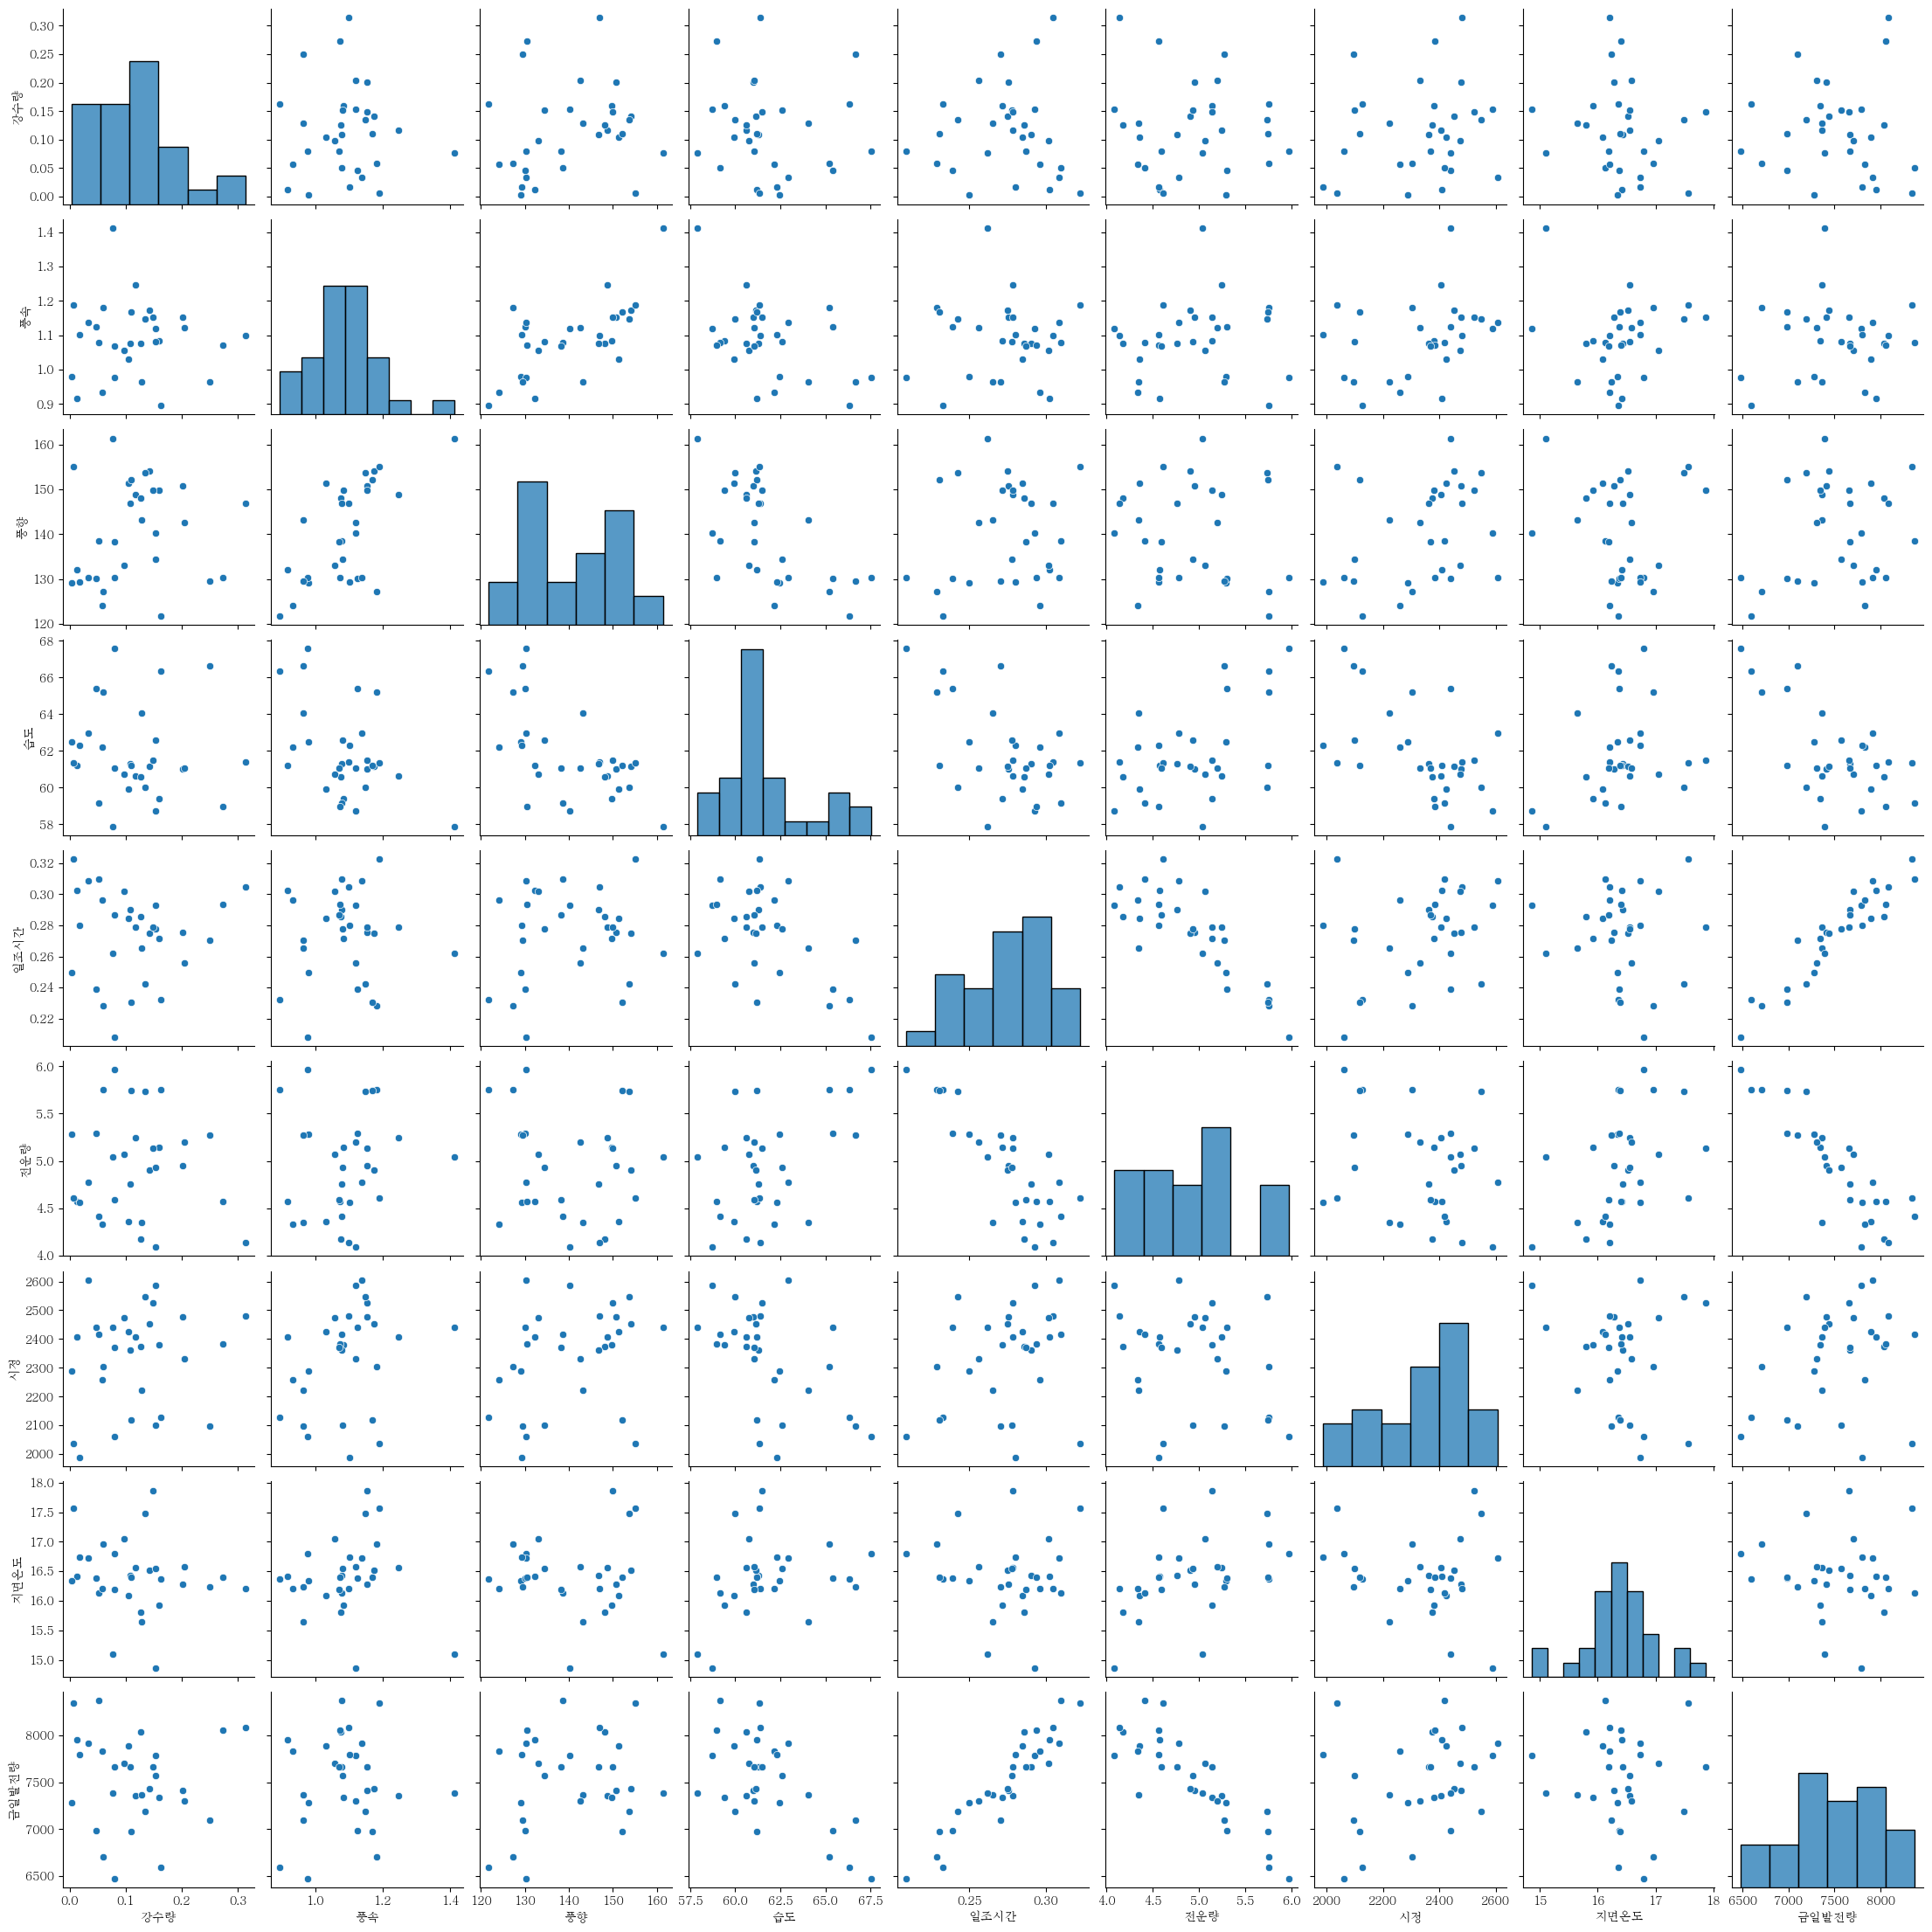

In [41]:
# 데이터 속성값 추가 관찰
df0 = data

g0 = df0.groupby('일')
gr0 = g0.mean()

gr0 = gr0.iloc[:,3:]

sns.pairplot(gr0)

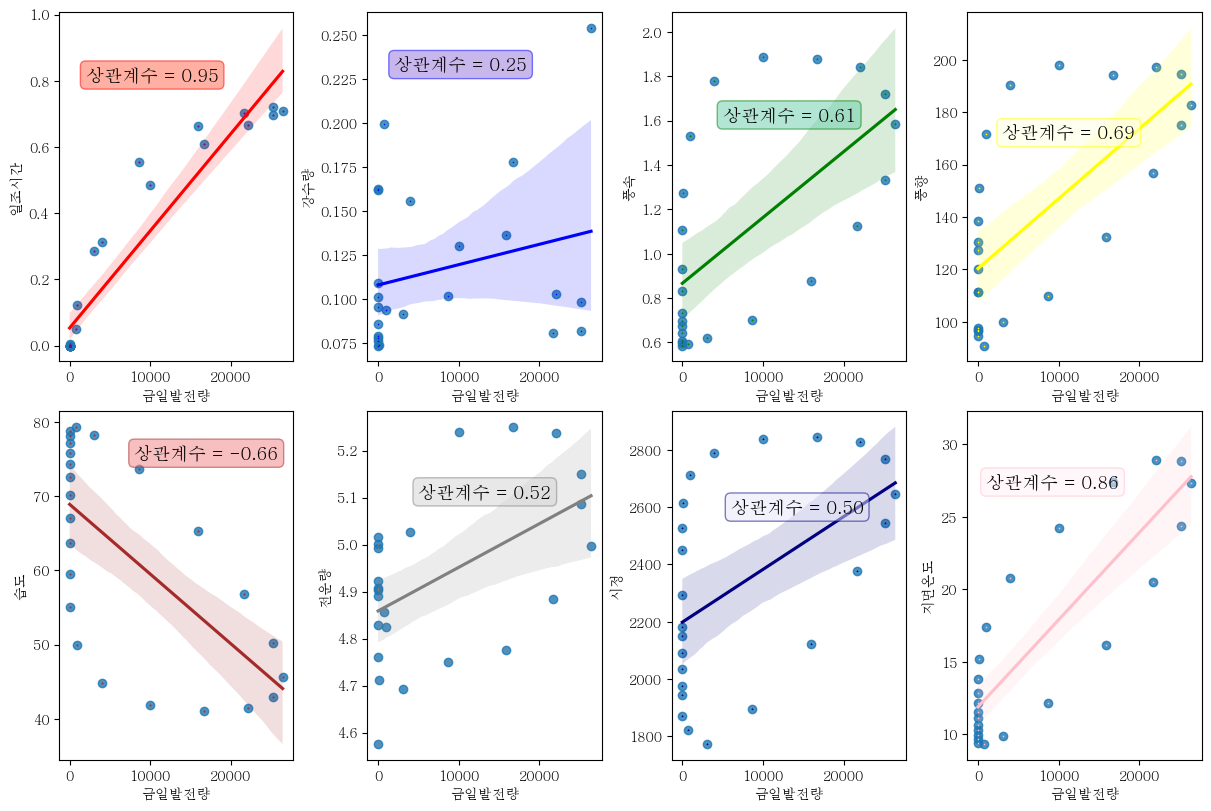

In [42]:
# 각 특성별 상관관계 분석
df1 = data

g1 = df1.groupby('시간')
g1 = g1.mean()


g1 = g1.iloc[:,3:].reset_index(drop=True)

# print(g1.head())


# 상관계수 구하기
df_corr = g1.corr()

# print(df_corr)

fig, axes = plt.subplots(2,4, figsize=(12,8), layout='constrained')
def Box_Style(c_num) :
  color=['tomato', 'mediumpurple', 'mediumaquamarine', 'lightyellow', 'lightcoral', 'lightgrey', 'lavender', 'lavenderblush']
  edge_color=['red', 'blue', 'green', 'yellow', 'brown', 'grey', 'navy', 'pink']
  box_style={'facecolor': color[c_num], 'edgecolor':edge_color[c_num],'boxstyle':'round','alpha':0.5}
  return box_style
font_style={'weight': 'bold', 'size':13}

axes[0][0].plot('금일발전량', '일조시간', data=g1, linestyle='none', marker='o', markersize=0.5, color='purple')
sns.regplot(x=g1['금일발전량'], y=g1['일조시간'], fit_reg=True, line_kws={'color':'red'}, ax=axes[0][0])

axes[0][1].plot('금일발전량', '강수량', data=g1, linestyle='none', marker='*', markersize=0.5, color='blue')
sns.regplot(x=g1['금일발전량'], y=g1['강수량'], fit_reg=True, line_kws={'color':'blue'}, ax=axes[0][1])

axes[0][2].plot('금일발전량', '풍속', data=g1, linestyle='none', marker='v', markersize=0.5, color='green')
sns.regplot(x=g1['금일발전량'], y=g1['풍속'], fit_reg=True, line_kws={'color':'green'}, ax=axes[0][2])

axes[0][3].plot('금일발전량', '풍향', data=g1, linestyle='none', marker='x', markersize=0.5, color='yellow')
sns.regplot(x=g1['금일발전량'], y=g1['풍향'], fit_reg=True, line_kws={'color':'yellow'}, ax=axes[0][3])

axes[1][0].plot('금일발전량', '습도', data=g1, linestyle='none', marker='o', markersize=0.5, color='brown')
sns.regplot(x=g1['금일발전량'], y=g1['습도'], fit_reg=True, line_kws={'color':'brown'}, ax=axes[1][0])

axes[1][1].plot('금일발전량', '전운량', data=g1, linestyle='none', marker='*', markersize=0.5, color='grey')
sns.regplot(x=g1['금일발전량'], y=g1['전운량'], fit_reg=True, line_kws={'color':'grey'}, ax=axes[1][1])

axes[1][2].plot('금일발전량', '시정', data=g1, linestyle='none', marker='v', markersize=0.5, color='navy')
sns.regplot(x=g1['금일발전량'], y=g1['시정'], fit_reg=True, line_kws={'color':'navy'}, ax=axes[1][2])

axes[1][3].plot('금일발전량', '지면온도', data=g1, linestyle='none', marker='x', markersize=0.5, color='pink')
sns.regplot(x=g1['금일발전량'], y=g1['지면온도'], fit_reg=True, line_kws={'color':'pink'}, ax=axes[1][3])

# figure별 상관계수 적용
cnt = 0
cd = [(2000, 0.8), (2000,0.23), (5000, 1.6), (3000, 170), (8000, 75), (5000,5.1), (6000, 2580), (1000, 27)]
corr_num = [4,0,1,2,3,5,6,7]
for i in range(2) :
  for j in range(4) :
    axes[i][j].text(cd[cnt][0], cd[cnt][1], f"상관계수 = {df_corr.iloc[8,corr_num[cnt]]:.2f}", color='k', fontdict=font_style, bbox=Box_Style(cnt))
    cnt+=1

# 테스트
# axes[0][0].text(6700, 0.315, f"상관계수 = {df_corr.iloc[0,corr_num[0]]:.2f}", color='k', fontdict=font_style, bbox=Box_Style(0))

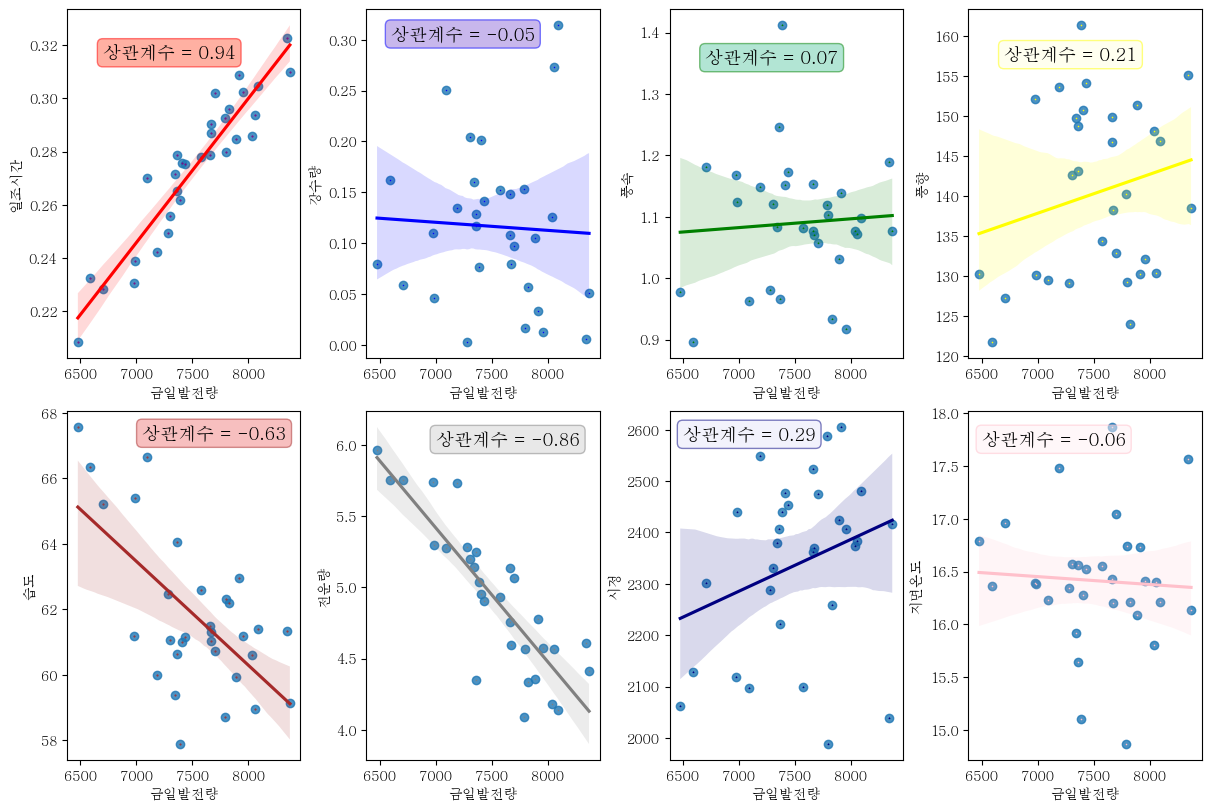

In [43]:
# 각 특성별 상관관계 분석
df1 = data

g1 = df1.groupby('일')
g1 = g1.mean()


g1 = g1.iloc[:,3:].reset_index(drop=True)

# print(g1.head())


# 상관계수 구하기
df_corr = g1.corr()

# print(df_corr)

fig, axes = plt.subplots(2,4, figsize=(12,8), layout='constrained')
def Box_Style(c_num) :
  color=['tomato', 'mediumpurple', 'mediumaquamarine', 'lightyellow', 'lightcoral', 'lightgrey', 'lavender', 'lavenderblush']
  edge_color=['red', 'blue', 'green', 'yellow', 'brown', 'grey', 'navy', 'pink']
  box_style={'facecolor': color[c_num], 'edgecolor':edge_color[c_num],'boxstyle':'round','alpha':0.5}
  return box_style
font_style={'weight': 'bold', 'size':13}

axes[0][0].plot('금일발전량', '일조시간', data=g1, linestyle='none', marker='o', markersize=0.5, color='purple')
sns.regplot(x=g1['금일발전량'], y=g1['일조시간'], fit_reg=True, line_kws={'color':'red'}, ax=axes[0][0])

axes[0][1].plot('금일발전량', '강수량', data=g1, linestyle='none', marker='*', markersize=0.5, color='blue')
sns.regplot(x=g1['금일발전량'], y=g1['강수량'], fit_reg=True, line_kws={'color':'blue'}, ax=axes[0][1])

axes[0][2].plot('금일발전량', '풍속', data=g1, linestyle='none', marker='v', markersize=0.5, color='green')
sns.regplot(x=g1['금일발전량'], y=g1['풍속'], fit_reg=True, line_kws={'color':'green'}, ax=axes[0][2])

axes[0][3].plot('금일발전량', '풍향', data=g1, linestyle='none', marker='x', markersize=0.5, color='yellow')
sns.regplot(x=g1['금일발전량'], y=g1['풍향'], fit_reg=True, line_kws={'color':'yellow'}, ax=axes[0][3])

axes[1][0].plot('금일발전량', '습도', data=g1, linestyle='none', marker='o', markersize=0.5, color='brown')
sns.regplot(x=g1['금일발전량'], y=g1['습도'], fit_reg=True, line_kws={'color':'brown'}, ax=axes[1][0])

axes[1][1].plot('금일발전량', '전운량', data=g1, linestyle='none', marker='*', markersize=0.5, color='grey')
sns.regplot(x=g1['금일발전량'], y=g1['전운량'], fit_reg=True, line_kws={'color':'grey'}, ax=axes[1][1])

axes[1][2].plot('금일발전량', '시정', data=g1, linestyle='none', marker='v', markersize=0.5, color='navy')
sns.regplot(x=g1['금일발전량'], y=g1['시정'], fit_reg=True, line_kws={'color':'navy'}, ax=axes[1][2])

axes[1][3].plot('금일발전량', '지면온도', data=g1, linestyle='none', marker='x', markersize=0.5, color='pink')
sns.regplot(x=g1['금일발전량'], y=g1['지면온도'], fit_reg=True, line_kws={'color':'pink'}, ax=axes[1][3])

# figure별 상관계수 적용
cnt = 0
cd = [(6700, 0.315), (6600,0.30), (6700, 1.35), (6700, 157), (7050, 67.2), (7000,6), (6500, 2580), (6500, 17.7)]
corr_num = [4,0,1,2,3,5,6,7]
for i in range(2) :
  for j in range(4) :
    axes[i][j].text(cd[cnt][0], cd[cnt][1], f"상관계수 = {df_corr.iloc[8,corr_num[cnt]]:.2f}", color='k', fontdict=font_style, bbox=Box_Style(cnt))
    cnt+=1

<AxesSubplot: >

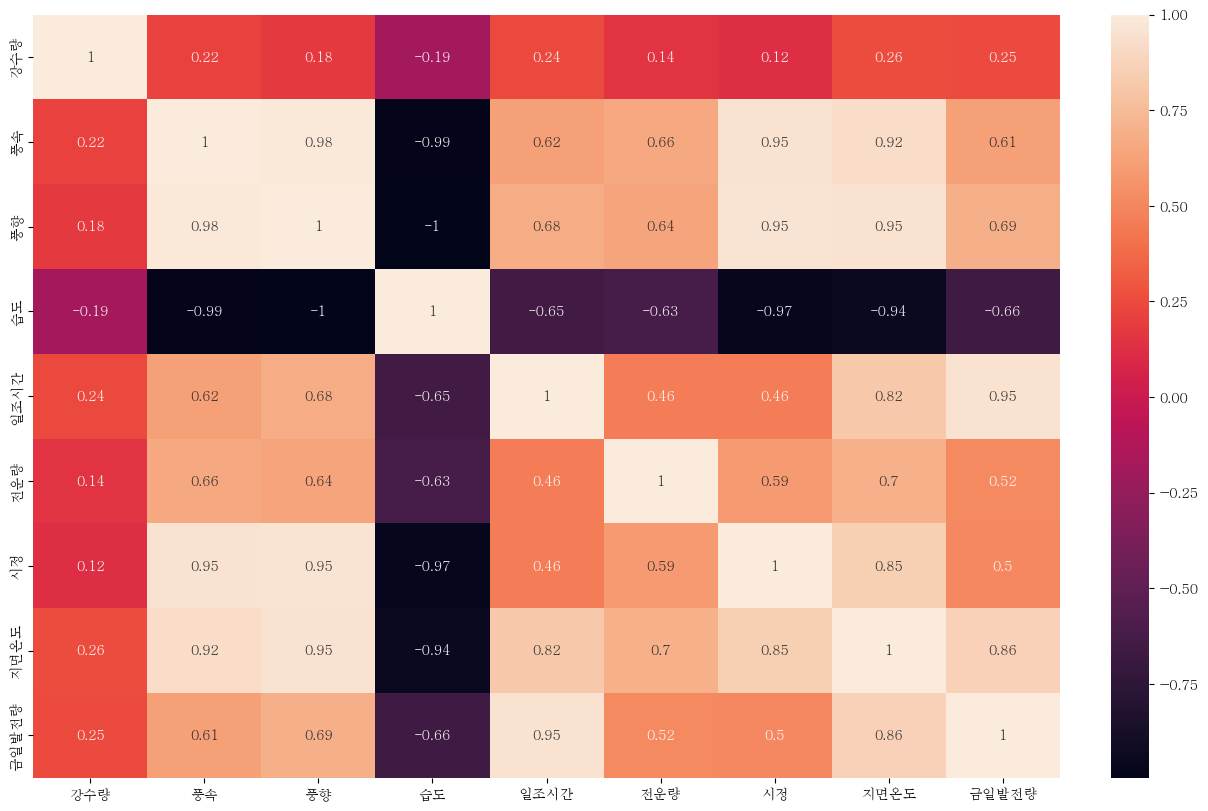

In [44]:
df2 = data

g2 = df2.groupby('시간')
g2 = g2.mean()

g2 = g2.iloc[:,3:].reset_index(drop=True)

fig = plt.subplots(figsize=(12,8), layout='constrained') 
sns.heatmap(g2.corr(), linecolor='white', annot=True)

<AxesSubplot: >

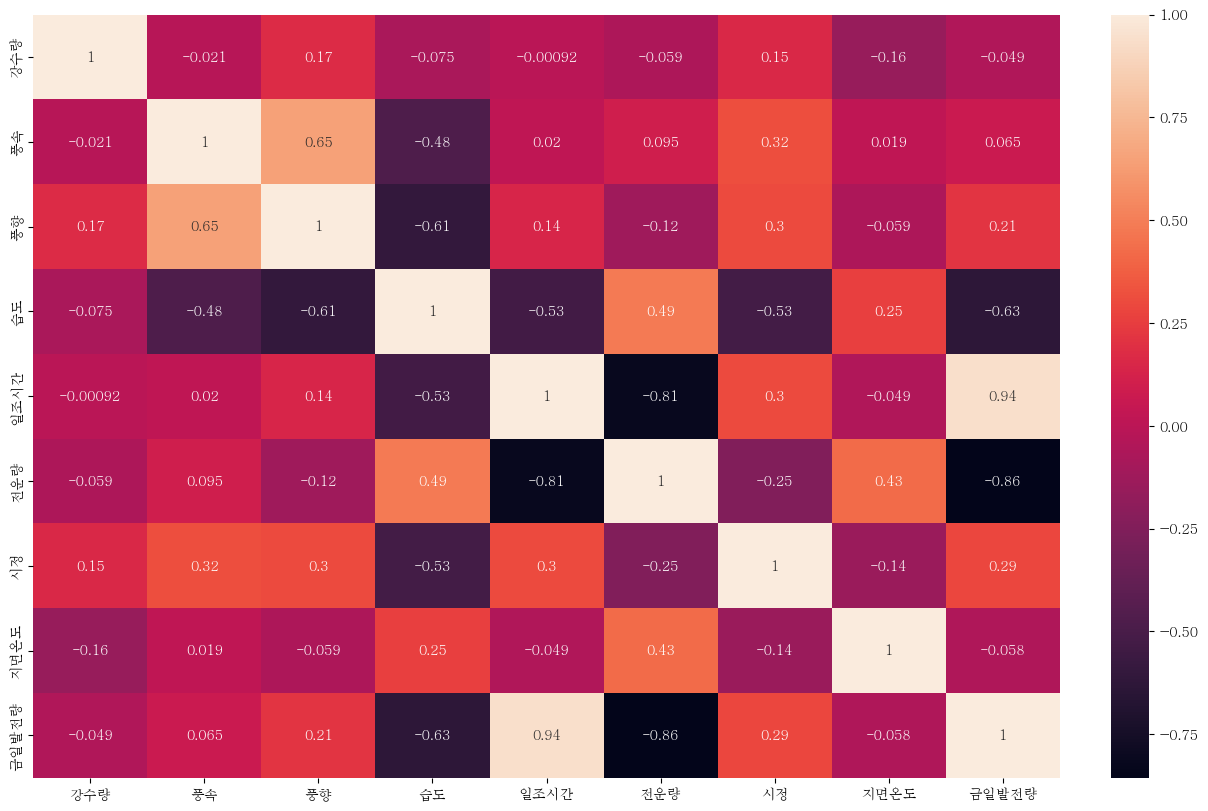

In [45]:
df2 = data

g2 = df2.groupby('일')
g2 = g2.mean()

g2 = g2.iloc[:,3:].reset_index(drop=True)

fig = plt.subplots(figsize=(12,8), layout='constrained') 
sns.heatmap(g2.corr(), linecolor='white', annot=True)

In [46]:
# Categorical Valiable(풍향, 일조시간, 전운량) One-Hot Encoding
df3 = data

encoder = OneHotEncoder()

df_encoded = pd.DataFrame()

encoded_wind = encoder.fit_transform(np.array(df3['풍향']).reshape(-1, 1)).toarray()
wind_categories = encoder.categories_[0]
wind_columns = ['풍향_' + str(category) for category in wind_categories]
df_encoded[wind_columns] = pd.DataFrame(encoded_wind, columns=wind_columns)


encoded_solar = encoder.fit_transform(np.array(df3['일조시간']).reshape(-1,1)).toarray()
solar_categories = encoder.categories_[0]
solar_columns = ['일조시간_' + str(category) for category in solar_categories]
df_encoded[solar_columns] = pd.DataFrame(encoded_solar, columns=solar_columns)

encoded_cloud = encoder.fit_transform(np.array(df3['전운량']).reshape(-1,1)).toarray()
cloud_categories = encoder.categories_[0]
cloud_columns = ['전운량_' + str(category) for category in cloud_categories]
df_encoded[cloud_columns] = pd.DataFrame(encoded_cloud, columns=cloud_columns)

print(df_encoded)


       풍향_0.0  풍향_20.0  풍향_50.0  풍향_70.0  풍향_90.0  풍향_110.0  풍향_140.0  \
0         0.0      0.0      1.0      0.0      0.0       0.0       0.0   
1         1.0      0.0      0.0      0.0      0.0       0.0       0.0   
2         1.0      0.0      0.0      0.0      0.0       0.0       0.0   
3         1.0      0.0      0.0      0.0      0.0       0.0       0.0   
4         1.0      0.0      0.0      0.0      0.0       0.0       0.0   
...       ...      ...      ...      ...      ...       ...       ...   
17513     0.0      0.0      0.0      0.0      0.0       0.0       0.0   
17514     1.0      0.0      0.0      0.0      0.0       0.0       0.0   
17515     1.0      0.0      0.0      0.0      0.0       0.0       0.0   
17516     0.0      0.0      0.0      0.0      0.0       0.0       0.0   
17517     1.0      0.0      0.0      0.0      0.0       0.0       0.0   

       풍향_160.0  풍향_180.0  풍향_200.0  ...  전운량_1.0  전운량_2.0  전운량_3.0  전운량_4.0  \
0           0.0       0.0       0.0  ...   

In [47]:
df3 = df3.drop(['풍향', '일조시간', '전운량'], axis=1)

# print(df3.shape, df_encoded.shape)

df3 = pd.concat([df3.iloc[:,:-1], df_encoded, df3.iloc[:,-1]], axis=1)

In [48]:
df3.head()

,년,월,일,시간,강수량,풍속,습도,시정,지면온도,풍향_0.0,...,전운량_2.0,전운량_3.0,전운량_4.0,전운량_5.0,전운량_6.0,전운량_7.0,전운량_8.0,전운량_9.0,전운량_10.0,금일발전량
0,2021,1,1,1,0.0,1.0,64.0,2000.0,-4.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,1,1,2,0.0,0.2,71.0,2000.0,-4.6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021,1,1,3,0.0,0.1,74.0,2000.0,-5.3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021,1,1,4,0.0,0.0,78.0,2000.0,-5.7,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021,1,1,5,0.0,0.2,80.0,2000.0,-6.1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# with open('encoded_final_data', 'wb') as file :
#   pickle.dump(df3, file)

In [50]:
# Normalization/Standardization (One-Hot Encoding 미적용)
# 각 특성들의 단위를 무시하고 값으로 단순 비교할 수 있도록 조정

df4 = data

df4.set_index(['년','월','일','시간'], inplace=True)
df4.reset_index(drop=True, inplace=True)

scaler = StandardScaler()

scaler.fit(df4.iloc[:,:-1])

df_scaled = pd.DataFrame(scaler.transform(df4.iloc[:,:-1]))
df_scaled = df_scaled.fillna(0.0)

df_scaled = pd.concat([df_scaled, df4.iloc[:,-1]], axis=1)

df_scaled.rename(columns={'금일발전량':8}, inplace=True)

In [51]:
print(df_scaled.head())

          0         1         2         3         4         5         6  \
0 -0.113213 -0.093143 -0.682700  0.096766 -0.666187 -1.234854 -0.220099   
1 -0.113213 -0.922672 -1.060294  0.407096 -0.666187 -1.234854 -0.220099   
2 -0.113213 -1.026363 -1.060294  0.540094 -0.666187 -1.234854 -0.220099   
3 -0.113213 -1.130055 -1.060294  0.717426 -0.666187 -1.234854 -0.220099   
4 -0.113213 -0.922672 -1.060294  0.806091 -0.666187 -1.234854 -0.220099   

          7    8  
0 -1.537179  0.0  
1 -1.574655  0.0  
2 -1.627121  0.0  
3 -1.657102  0.0  
4 -1.687083  0.0  


In [52]:
# with open('StandardScalar_final_data', 'wb') as file :
#   pickle.dump(df_scaled, file)

In [53]:
with open('final_data', 'rb') as file :
  data = pickle.load(file)

data = data.drop(['일사량', '적설량'], axis=1)

df5 = data

df5.set_index(['년','월','일','시간'], inplace=True)
df5.reset_index(drop=True, inplace=True)

scaler = MinMaxScaler()

scaler.fit(df5.iloc[:,:-1])

df_scaled = pd.DataFrame(scaler.transform(df5.iloc[:,:-1]))
df_scaled = df_scaled.fillna(0.0)

df_scaled

df_scaled = pd.concat([df_scaled, df5.iloc[:,-1]], axis=1)

df_scaled.rename(columns={'금일발전량':8}, inplace=True)

print(df_scaled.head())

     0         1         2         3    4    5         6         7    8
0  0.0  0.131579  0.138889  0.646465  0.0  0.0  0.045096  0.105114  0.0
1  0.0  0.026316  0.000000  0.717172  0.0  0.0  0.045096  0.098011  0.0
2  0.0  0.013158  0.000000  0.747475  0.0  0.0  0.045096  0.088068  0.0
3  0.0  0.000000  0.000000  0.787879  0.0  0.0  0.045096  0.082386  0.0
4  0.0  0.026316  0.000000  0.808081  0.0  0.0  0.045096  0.076705  0.0


In [54]:
# with open('MinMaxScaler_final_data', 'wb') as file :
#   pickle.dump(df_scaled, file)

In [55]:
# Normalization/Standardization (One-Hot Encoding 적용)
# 각 특성들의 단위를 무시하고 값으로 단순 비교할 수 있도록 조정

df6 = df3

df6.set_index(['년','월','일','시간'], inplace=True)
df6.reset_index(drop=True, inplace=True)

scaler = StandardScaler()

scaler.fit(df6.iloc[:,:-1])

df_scaled = pd.DataFrame(scaler.transform(df6.iloc[:,:-1]))
df_scaled = df_scaled.fillna(0.0)

df_scaled = pd.concat([df_scaled, df6.iloc[:,-1]], axis=1)

df_scaled.rename(columns={'금일발전량':44}, inplace=True)


In [56]:
print(df_scaled.head())

         0         1         2         3         4         5         6   \
0 -0.113213 -0.093143  0.096766 -0.220099 -1.537179 -0.663439 -0.261843   
1 -0.113213 -0.922672  0.407096 -0.220099 -1.574655  1.507298 -0.261843   
2 -0.113213 -1.026363  0.540094 -0.220099 -1.627121  1.507298 -0.261843   
3 -0.113213 -1.130055  0.717426 -0.220099 -1.657102  1.507298 -0.261843   
4 -0.113213 -0.922672  0.806091 -0.220099 -1.687083  1.507298 -0.261843   

         7         8         9   ...        35        36        37        38  \
0  3.924617 -0.174211 -0.117359  ... -0.172112 -0.180882 -0.190263 -0.216739   
1 -0.254802 -0.174211 -0.117359  ... -0.172112 -0.180882 -0.190263 -0.216739   
2 -0.254802 -0.174211 -0.117359  ... -0.172112 -0.180882 -0.190263 -0.216739   
3 -0.254802 -0.174211 -0.117359  ... -0.172112 -0.180882 -0.190263 -0.216739   
4 -0.254802 -0.174211 -0.117359  ... -0.172112 -0.180882 -0.190263 -0.216739   

         39        40        41        42      43   44  
0 -0.269356

In [57]:
# with open('encoded_StandardScalar_final_data', 'wb') as file :
#   pickle.dump(df_scaled, file)

In [58]:
with open('encoded_final_data', 'rb') as file :
  data = pickle.load(file)

df7 = data

df7.set_index(['년','월','일','시간'], inplace=True)
df7.reset_index(drop=True, inplace=True)

scaler = MinMaxScaler()

scaler.fit(df7.iloc[:,:-1])

df_scaled = pd.DataFrame(scaler.transform(df7.iloc[:,:-1]))
df_scaled = df_scaled.fillna(0.0)

df_scaled = pd.concat([df_scaled, df7.iloc[:,-1]], axis=1)

df_scaled.rename(columns={'금일발전량':44}, inplace=True)

In [59]:
# with open('encoded_MinMaxScalar_final_data', 'wb') as file :
#   pickle.dump(df_scaled, file)

In [60]:
with open('Basic_final_data', 'rb') as file :
  Base_data = pickle.load(file)

In [61]:
# print(Base_data.tail())

Base_data = Base_data.drop(['지역'], axis=1)
Base_data.set_index(['년','월','일','시간'], inplace=True)
Base_data.reset_index(drop=True, inplace=True)

# Base_data.rename(columns={'발전량':'금일발전량'}, inplace=True)


Base_data['금일발전량'] = Base_data['발전량']
Base_data = Base_data.drop(['발전량'], axis=1)

Base_data

,강수량,풍속,풍향,습도,일조시간,일사량,전운량,시정,금일발전량
0,0.0,3.6,360.0,67.0,0.0,0.0,0.0,1438.0,0.00
1,0.0,4.0,360.0,67.0,0.0,0.0,0.0,1572.0,0.00
2,0.0,1.5,360.0,69.0,0.0,0.0,0.0,1407.0,0.00
3,0.0,0.4,0.0,67.0,0.0,0.0,0.0,1392.0,0.00
4,0.0,3.3,320.0,68.0,0.0,0.0,0.0,1335.0,0.00
...,...,...,...,...,...,...,...,...,...
52573,0.0,2.1,250.0,48.0,0.0,0.0,0.0,4309.0,2.48
52574,0.0,2.9,250.0,51.0,0.0,0.0,0.0,3672.0,3.40
52575,0.0,1.6,200.0,50.0,0.0,0.0,0.0,3800.0,2.64
52576,0.0,2.5,230.0,52.0,0.0,0.0,0.0,3406.0,1.05


In [62]:
df = Base_data

scaler = StandardScaler()

scaler.fit(df.iloc[:,:-1])

df_scaled = pd.DataFrame(scaler.transform(df.iloc[:,:-1]))
df_scaled = df_scaled.fillna(0.0)

df_scaled = pd.concat([df_scaled, df.iloc[:,-1]], axis=1)

df_scaled.rename(columns={'금일발전량':8}, inplace=True)

df_scaled

,0,1,2,3,4,5,6,7,8
0,-0.114319,0.256023,1.655448,0.188696,-0.686676,-0.668423,-1.125648,-0.705765,0.00
1,-0.114319,0.483073,1.655448,0.188696,-0.686676,-0.668423,-1.125648,-0.616505,0.00
2,-0.114319,-0.935986,1.655448,0.284980,-0.686676,-0.668423,-1.125648,-0.726415,0.00
3,-0.114319,-1.560372,-1.625688,0.188696,-0.686676,-0.668423,-1.125648,-0.736407,0.00
4,-0.114319,0.085736,1.290878,0.236838,-0.686676,-0.668423,-1.125648,-0.774376,0.00
...,...,...,...,...,...,...,...,...,...
52573,-0.114319,-0.595412,0.652879,-0.726003,-0.686676,-0.668423,-1.125648,1.206665,2.48
52574,-0.114319,-0.141313,0.652879,-0.581577,-0.686676,-0.668423,-1.125648,0.782347,3.40
52575,-0.114319,-0.879224,0.197166,-0.629719,-0.686676,-0.668423,-1.125648,0.867610,2.64
52576,-0.114319,-0.368363,0.470594,-0.533435,-0.686676,-0.668423,-1.125648,0.605159,1.05


In [63]:
# with open('Basic_StandardScalar_final_data', 'wb') as file :
#   pickle.dump(df_scaled, file)

In [64]:
with open('Basic_final_data', 'rb') as file :
  Base_data = pickle.load(file)

Base_data = Base_data.drop(['지역'], axis=1)
Base_data.set_index(['년','월','일','시간'], inplace=True)
Base_data.reset_index(drop=True, inplace=True)

Base_data['금일발전량'] = Base_data['발전량']
Base_data = Base_data.drop(['발전량'], axis=1)

df = Base_data

scaler = MinMaxScaler()

scaler.fit(df.iloc[:,:-1])

df_scaled = pd.DataFrame(scaler.transform(df.iloc[:,:-1]))
df_scaled = df_scaled.fillna(0.0)

df_scaled = pd.concat([df_scaled, df.iloc[:,-1]], axis=1)

df_scaled.rename(columns={'금일발전량':8}, inplace=True)

df_scaled

,0,1,2,3,4,5,6,7,8
0,0.0,0.198895,1.000000,0.645161,0.0,0.0,0.0,0.2876,0.00
1,0.0,0.220994,1.000000,0.645161,0.0,0.0,0.0,0.3144,0.00
2,0.0,0.082873,1.000000,0.666667,0.0,0.0,0.0,0.2814,0.00
3,0.0,0.022099,0.000000,0.645161,0.0,0.0,0.0,0.2784,0.00
4,0.0,0.182320,0.888889,0.655914,0.0,0.0,0.0,0.2670,0.00
...,...,...,...,...,...,...,...,...,...
52573,0.0,0.116022,0.694444,0.440860,0.0,0.0,0.0,0.8618,2.48
52574,0.0,0.160221,0.694444,0.473118,0.0,0.0,0.0,0.7344,3.40
52575,0.0,0.088398,0.555556,0.462366,0.0,0.0,0.0,0.7600,2.64
52576,0.0,0.138122,0.638889,0.483871,0.0,0.0,0.0,0.6812,1.05


In [65]:
# with open('Basic_MinMaxScalar_final_data', 'wb') as file :
#   pickle.dump(df_scaled, file)